# Introduction  
The goal of this project is to see if there is a connection between life expectancy and GDP,

meaning if the GDP is on the rise, does the life expectancy changes accordingly? and how? 

GDP is (Gross Domestic Product) is the total monetary value of all goods and services produced within a country's borders in a specific time period.

It’s an indicator of a nation’s economic health and performance. In this data the GDP units are us dollars. 

## Python Modules Import

In [190]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Data Loading

Loading the data into dataframe to analyze and visualize it. 

In [191]:
df = pd.read_csv('all_data.csv')
df.head() # Display the first few rows of the DataFrame to understand its structure and contents.

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Data integrity and name refactoring

Making sure all the columns include the same number of values, and display the data types

Renaming columns to simplfy analisys - one word or phrase, small letters only

Renaming United States of America to USA to save space on graphs

In [192]:
df = df.rename(columns={'Country': 'country', 'Year': 'year', 'Life expectancy at birth (years)': 'life_expectancy', 'GDP': 'gdp'})
df['country'] = df['country'].replace('United States of America', 'USA')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          96 non-null     object 
 1   year             96 non-null     int64  
 2   life_expectancy  96 non-null     float64
 3   gdp              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


## Data Exploration
Initial exploration of the data would allow to better understand how to analyze it. The data includes six countries: 
Chile, China, Germany, Mexico, USA and Zimbabwe

In [193]:
countries = df.country.unique()
countries

array(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'],
      dtype=object)

The data representd gdp and life expecancy data from 2000 to 2015. 

In [194]:
years = df.year.unique()
years

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

Getting the averages of GDP and life expectancy for each country and general averages

## Graph Exploration
# need to move this 
Let's begin our analysis with some foundational visualizations to uncover trends and distributions in GDP and life expectancy.
The first graph illustrates life expectancy across countries. Notably, the USA stands out with a significantly higher GDP compared to the others, while Zimbabwe ranks lowest. This highlights a substantial degree of variability among the nations.

C:\Users\Yoav\AppData\Local\Temp\ipykernel_16304\2579692757.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='country', y='gdp', palette='muted')


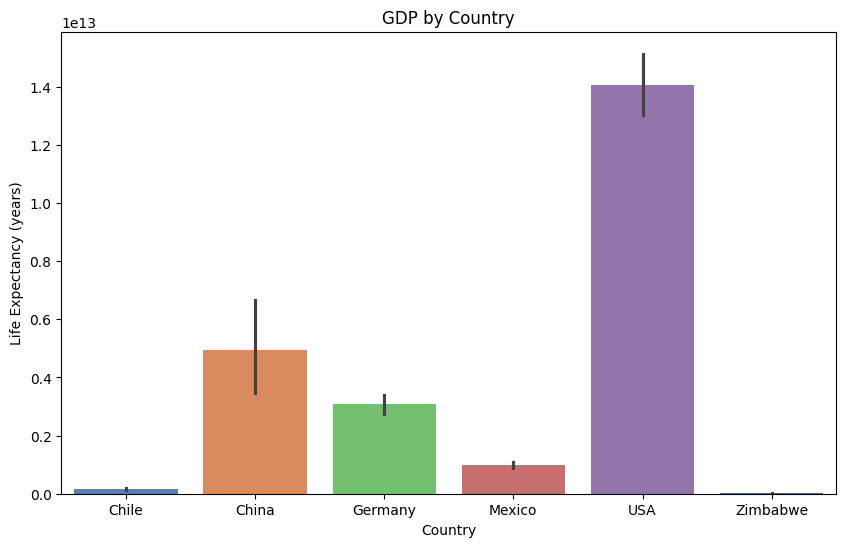

<Figure size 640x480 with 0 Axes>

In [188]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='country', y='gdp', palette='muted')
plt.title('GDP by Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (years)')
plt.show()
plt.clf()

The distribution of GDP values is highly right-skewed, The shape closely resembles a Pareto-like or power-law distribution, where a minority holds the majority of the economic output, which here is the usa over all the others. 

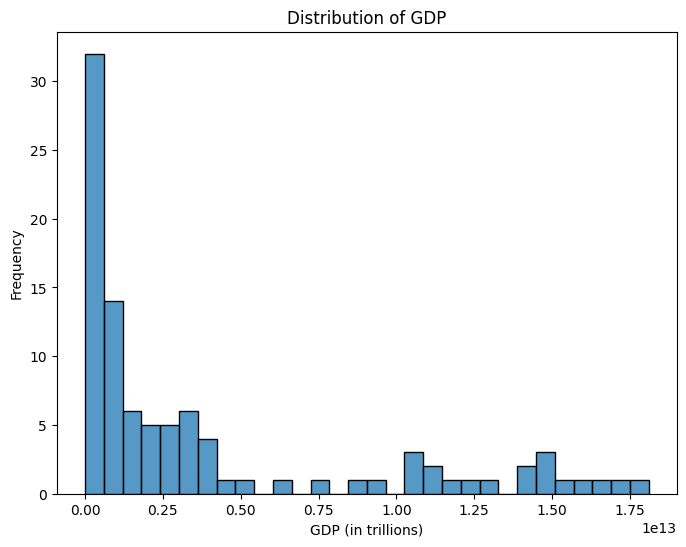

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='gdp', bins=30, kde=False)
plt.title('Distribution of GDP')
plt.xlabel('GDP (in trillions)')        
plt.ylabel('Frequency')
plt.show()
plt.clf()

In the life expectancy comparison across six countries, Germany stands out with the highest average, followed closely by Chile and the United States. On the opposite end, Zimbabwe has the lowest life expectancy and is notably the only country in the group with a value below the overall mean of 72.8 years, which makes zimbabwe kind of an outlier. 

In [197]:
le_mean = df['life_expectancy'].mean()
print(f"Mean Life Expectancy: {le_mean:.2f} years")

Mean Life Expectancy: 72.79 years


C:\Users\Yoav\AppData\Local\Temp\ipykernel_16304\1629380139.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='country', y='life_expectancy', palette='viridis')


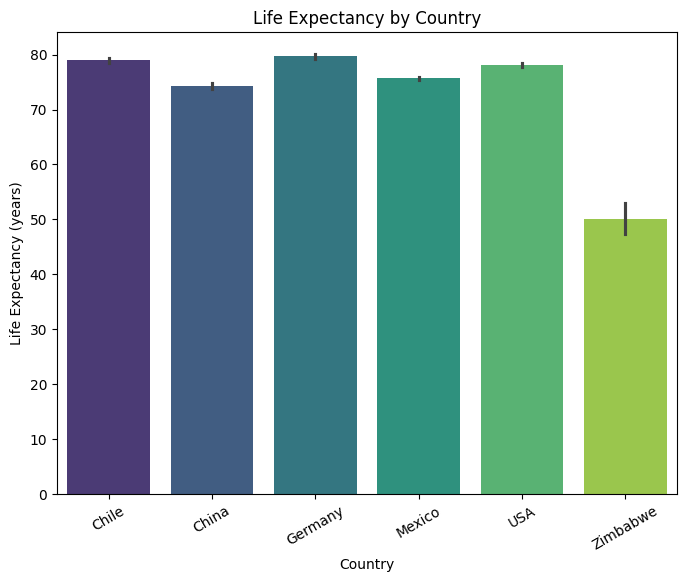

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='country', y='life_expectancy', palette='viridis')
plt.title('Life Expectancy by Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (years)')
plt.xticks(rotation=30)
plt.show()
plt.clf()

The distribution is strongly left-skewed, driven by Zimbabwe’s low life expectancy. The other five countries cluster above the average of 72.8 years, creating a concentration on the right and a long tail to the left.

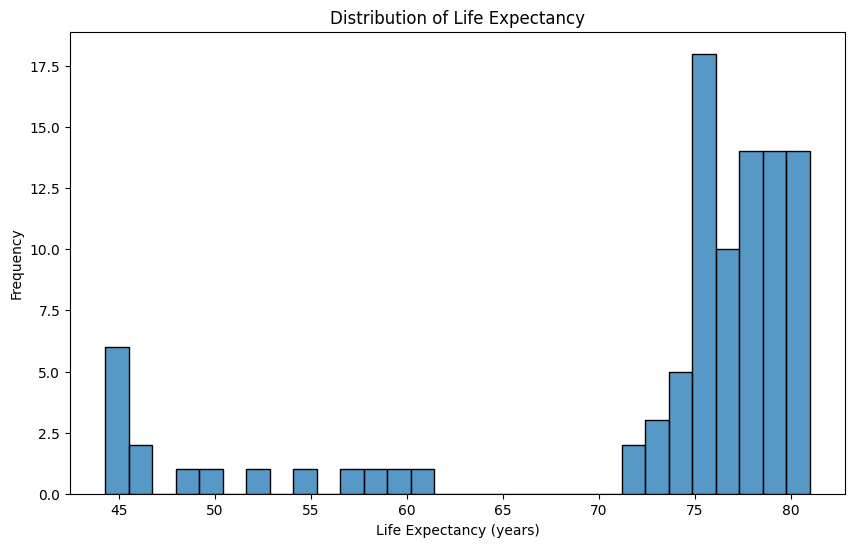

<Figure size 640x480 with 0 Axes>

In [198]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='life_expectancy', bins=30, kde=False)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Frequency')
plt.show()
plt.clf()

The graph shows that the U.S. and China have steep slopes—GDP rises sharply while life expectancy increases only slightly. Germany and Mexico have gentler slopes, indicating more balanced growth. Chile and Zimbabwe show flat slopes, with life expectancy improving despite minimal GDP growth.

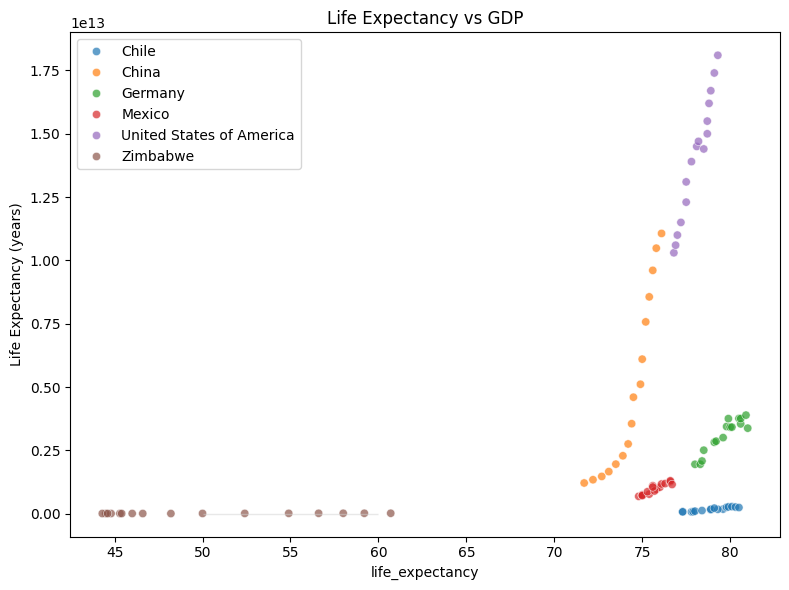

<Figure size 640x480 with 0 Axes>

In [180]:
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='life_expectancy', y='gdp', markers='o', hue='country', alpha=0.7)
plt.title('Life Expectancy vs GDP')
plt.fill_betweenx(y=[40, 90], x1=50, x2=60, color='lightgray', alpha=0.5)
plt.ylabel('Life Expectancy (years)')       
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.clf()

To examine the connection between GDP and life expectancy more closely, we can plot each country separately by year. These individual graphs reveal upward trends in both GDP and life expectancy—even for Zimbabwe and Chile, which appeared flat in the original graph, and point to a positive correlation bettween GDP and life expectancy 

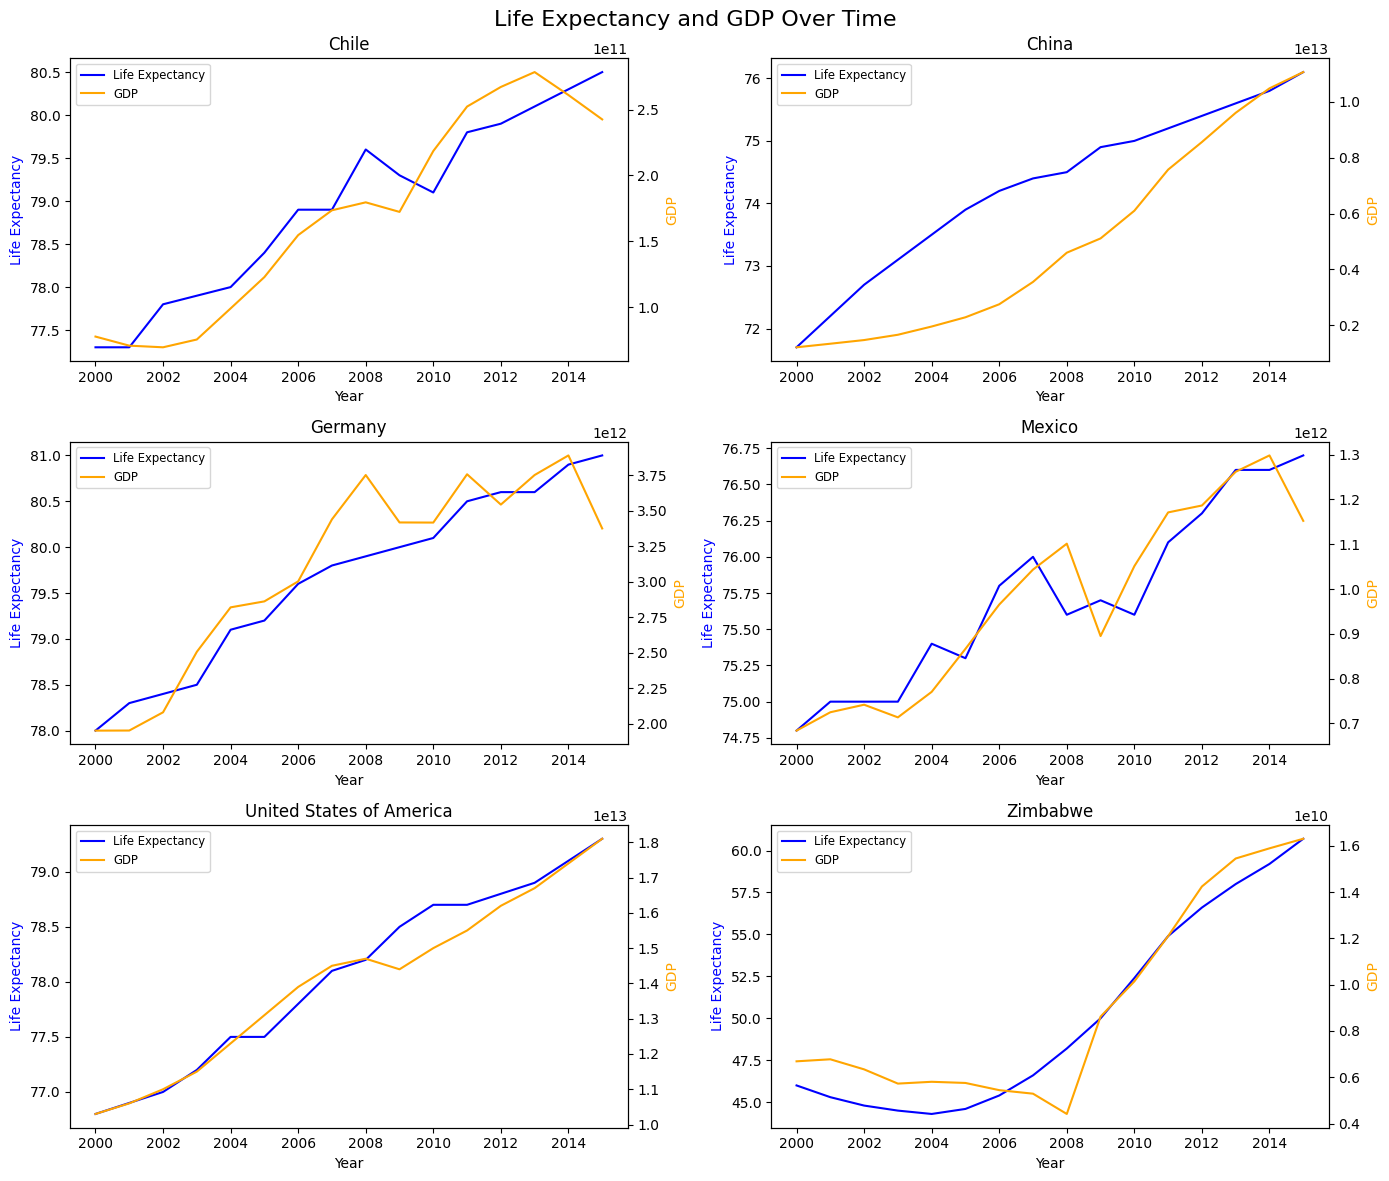

In [154]:
# Create 3x2 grid
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Life Expectancy and GDP Over Time', fontsize=16)
axes = axes.flatten()

# Loop through countries and plot
for i, country in enumerate(countries):
    data = df[df['country'] == country]
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # Plot using matplotlib for better control
    line1, = ax1.plot(data['year'], data['life_expectancy'], color='blue', label='Life Expectancy')
    line2, = ax2.plot(data['year'], data['gdp'], color='orange', label='GDP')

    # Add combined legend to ax1
    ax1.legend(handles=[line1, line2], loc='upper left', fontsize='small')

    # Titles and labels
    ax1.set_title(country)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Life Expectancy', color='blue')
    ax2.set_ylabel('GDP', color='orange')

# Tidy up layout
plt.tight_layout()
plt.show()

Conclusions
By analyzing various aspects of the data—life expectancy over time, GDP over time, their relationship by country, and the distribution of each variable—we observed the following:

- In every country, both GDP and life expectancy have increased over the 15-year period.

- There is a clear positive correlation between GDP and life expectancy across all countries.

- The average life expectancy is around 72 years, with most countries exceeding this figure except Zimbabwe.

- GDP distribution is highly right-skewed, indicating a power-law pattern where a small number of countries have very high GDP.

- Life expectancy distribution is left-skewed, suggesting that most countries have relatively high life expectancy, with a few outliers on the lower end.
